# Lending Club Case Study
Lending  is Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Lending Club is facing credit loss because of defaulters who refuse to pay or runs away with the money owned. So Lending Club wants identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.  Company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default by applying Exploratory Data Analysis techniques.

The objective of this case study is to analyze historical data and identify the variables which can help Lending Club to decide on whether loan can provided to their customers or not.



## Data Cleaning and Manipulation


In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("loan.csv", low_memory=False)

In [166]:
df.shape

(39717, 111)

### Snapshot of the dataset
Dataset (loan.csv) contains 111 columns and 39,717 rows of data.

### Data Cleaning
To start with try to clean the dataset by applying data cleaning guide lines.

#### 1. Fix rows and columns
Looking at the data set there are lot of columns with NA values, lets try to remove those columns.

In [167]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [168]:
df2=df.dropna(how='all',axis=1)


After removing NA columns, there are 57 columns remaining. Lets also try to delete columns which contain only 0, NaN

In [169]:
df3 = df2.loc[:, (~df2.isin([0,np.NaN, 'NA'])).any(axis=0)]


Now we are left with 52 columns, look at the columns and see which columns mayn not be required for analysis i.e. id, memeber id etc.

Columns with no significance  - id,member_id,url
Columns with only one unique value across all rows - application_type (is always individual),pymnt_plan,initial_list_status,policy_code

In [170]:
df3.nunique().sort_values()

policy_code                    1
initial_list_status            1
application_type               1
pymnt_plan                     1
next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util

In [171]:
df4 = df3.drop(columns=['id','member_id', 'url','application_type','pymnt_plan','initial_list_status','policy_code'])

Lets also drop funded_amnt and funded_amnt_inv as both values are very close to loan amount.

In [172]:
df4 = df4.drop(columns=['funded_amnt', 'funded_amnt_inv'])

After dropping those columns, 45 columns are left.

#Data Analysis

### Univariate Analysis
Lets look at the loan amount column and anlayze its values.

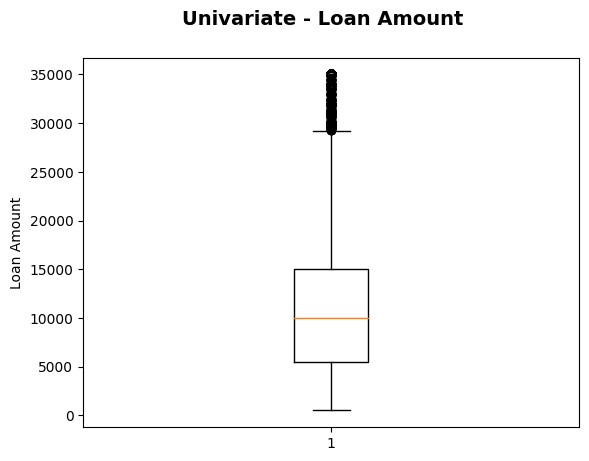

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [173]:
fig = plt.figure()
fig.suptitle("Univariate - Loan Amount", fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(df4['loan_amnt'])
ax.set_ylabel("Loan Amount")
plt.show()
df4['loan_amnt'].describe()

Loan amount has median is 10,000, 25th quartile is 5,500 and 75th quartile is 15,000

Lets look at the distribution of annual income

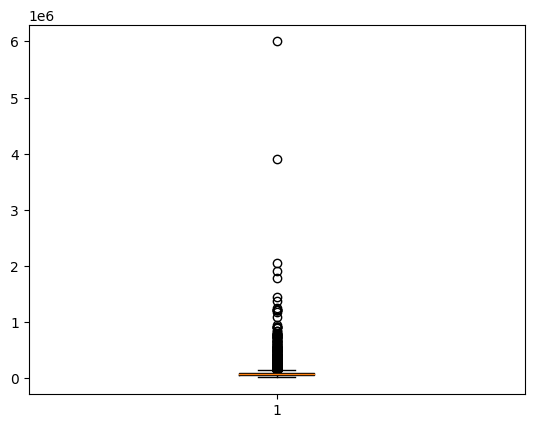

In [174]:
plt.boxplot(df4['annual_inc'])
plt.show()


Median seems to be around 59,000 with lot of outliers. So lets take 95th percentile data for the analysis.

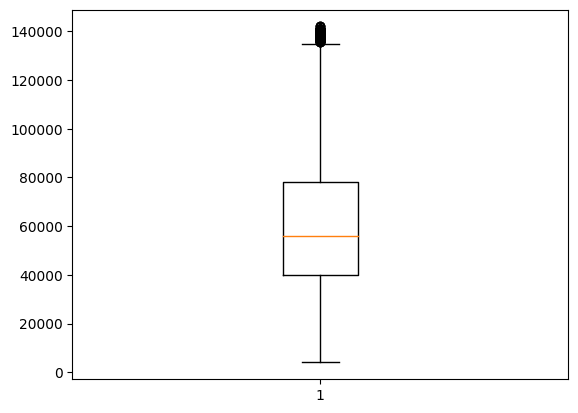

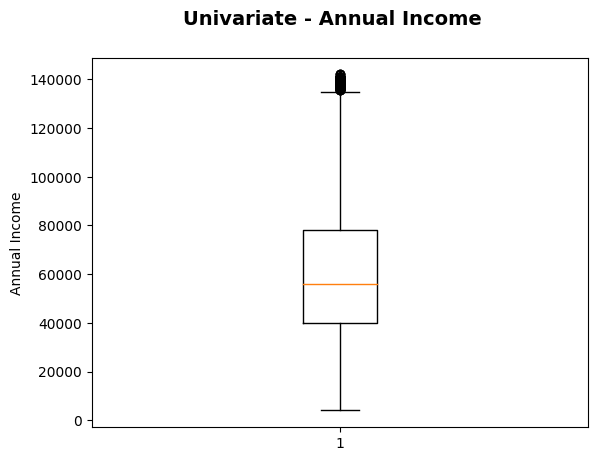

count     37730.000000
mean      61043.976506
std       27795.211362
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

In [175]:
df4['annual_inc'].quantile(.95)
plt.boxplot(df4['annual_inc'][df4['annual_inc']<df4['annual_inc'].quantile(.95)])
fig = plt.figure()
fig.suptitle("Univariate - Annual Income", fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(df4['annual_inc'][df4['annual_inc']<df4['annual_inc'].quantile(.95)])
ax.set_ylabel("Annual Income")
plt.show()
df4['annual_inc'][df4['annual_inc']<df4['annual_inc'].quantile(.95)].describe()

Lets try to remove outliers based on annual income.

In [176]:
df5 = df4[df4['annual_inc'] < df4['annual_inc'].quantile(.95)]

In [177]:
df5['loan_status'].value_counts()

Fully Paid     31256
Charged Off     5420
Current         1054
Name: loan_status, dtype: int64

After filtering annual income outliers we now have 37730 rows.

Lets analyze loan status column

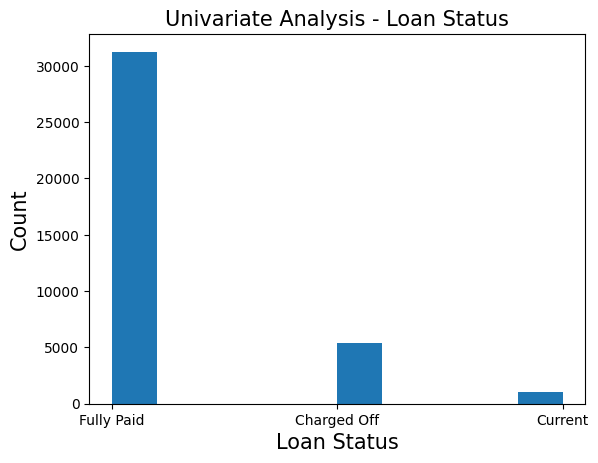

In [178]:
plt.hist(df5['loan_status'])
plt.xlabel('Loan Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Univariate Analysis - Loan Status', fontsize=15)
plt.show()

Lets analyze loan purpose

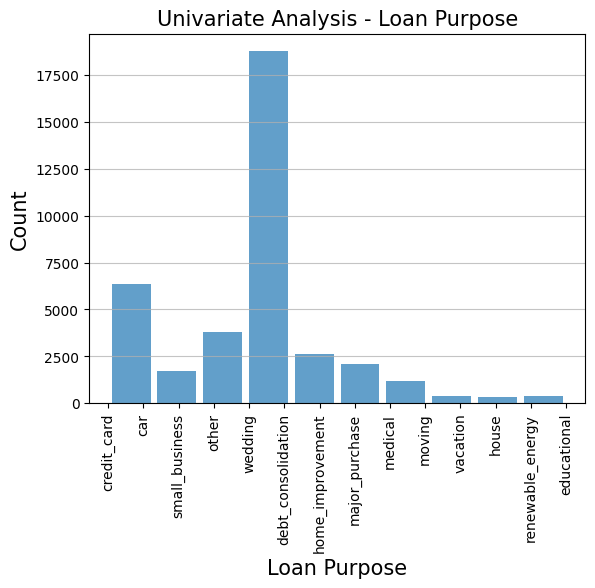

In [179]:
plt.hist(df5['purpose'], rwidth=0.85, alpha=0.7)
plt.xlabel('Loan Purpose', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y',alpha=0.75)
plt.xticks(rotation='vertical')
plt.title('Univariate Analysis - Loan Purpose', fontsize=15)
plt.show()

Lets analyze home ownership

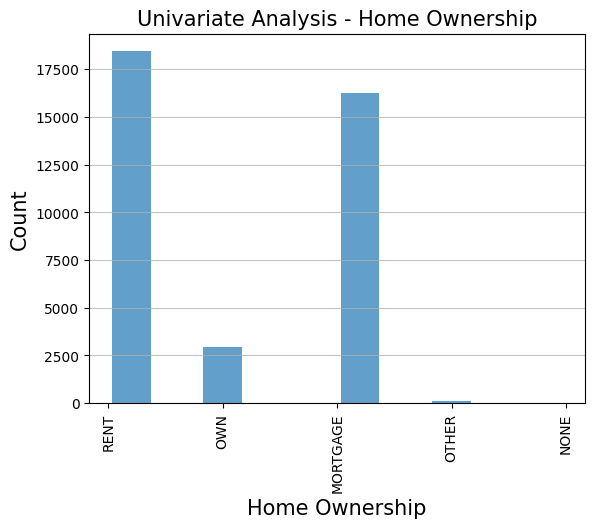

In [180]:
plt.hist(df5['home_ownership'], rwidth=0.85, alpha=0.7)
plt.xlabel('Home Ownership', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y',alpha=0.75)
plt.xticks(rotation='vertical')
plt.title('Univariate Analysis - Home Ownership', fontsize=15)
plt.show()

Lets analyze verification status

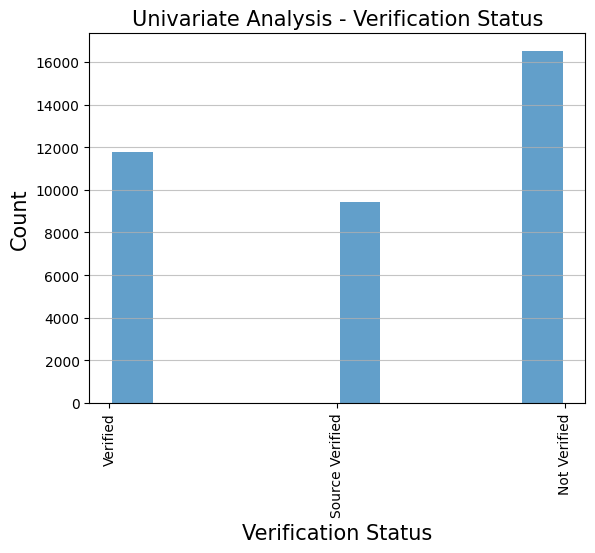

In [181]:
plt.hist(df5['verification_status'], rwidth=0.895, alpha=0.7)
plt.xlabel('Verification Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y',alpha=0.75)
plt.xticks(rotation='vertical')
plt.title('Univariate Analysis - Verification Status', fontsize=15)
plt.show()

Lets analyze data on term

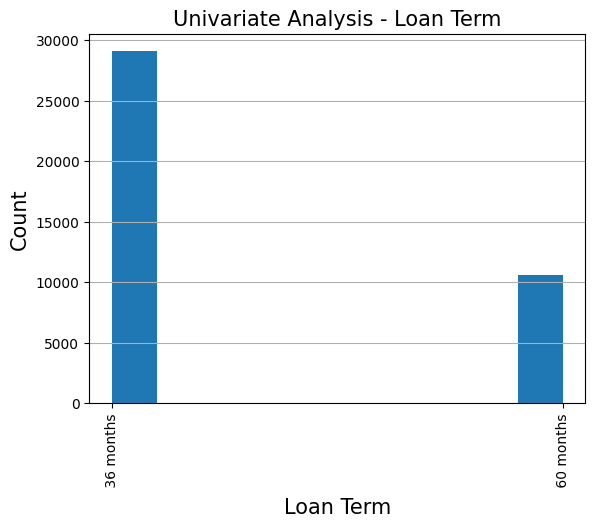

In [182]:
plt.hist(df2['term'])
plt.xlabel('Loan Term', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.title('Univariate Analysis - Loan Term', fontsize=15)
plt.show()

Lets analyze data on grade

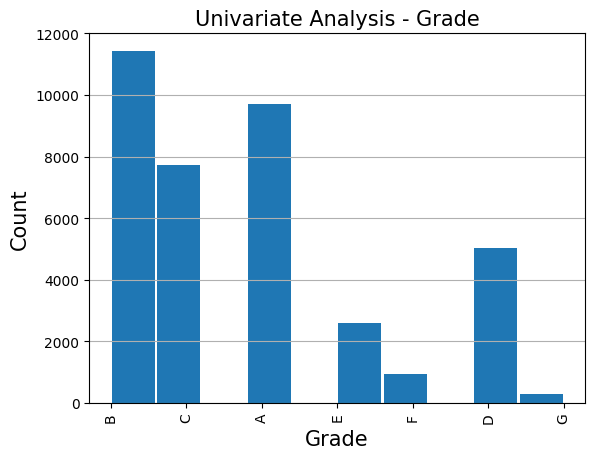

In [183]:
plt.hist(df5['grade'], rwidth=0.95)
plt.xlabel('Grade', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.title('Univariate Analysis - Grade', fontsize=15)
plt.show()

Lets analyze on state field

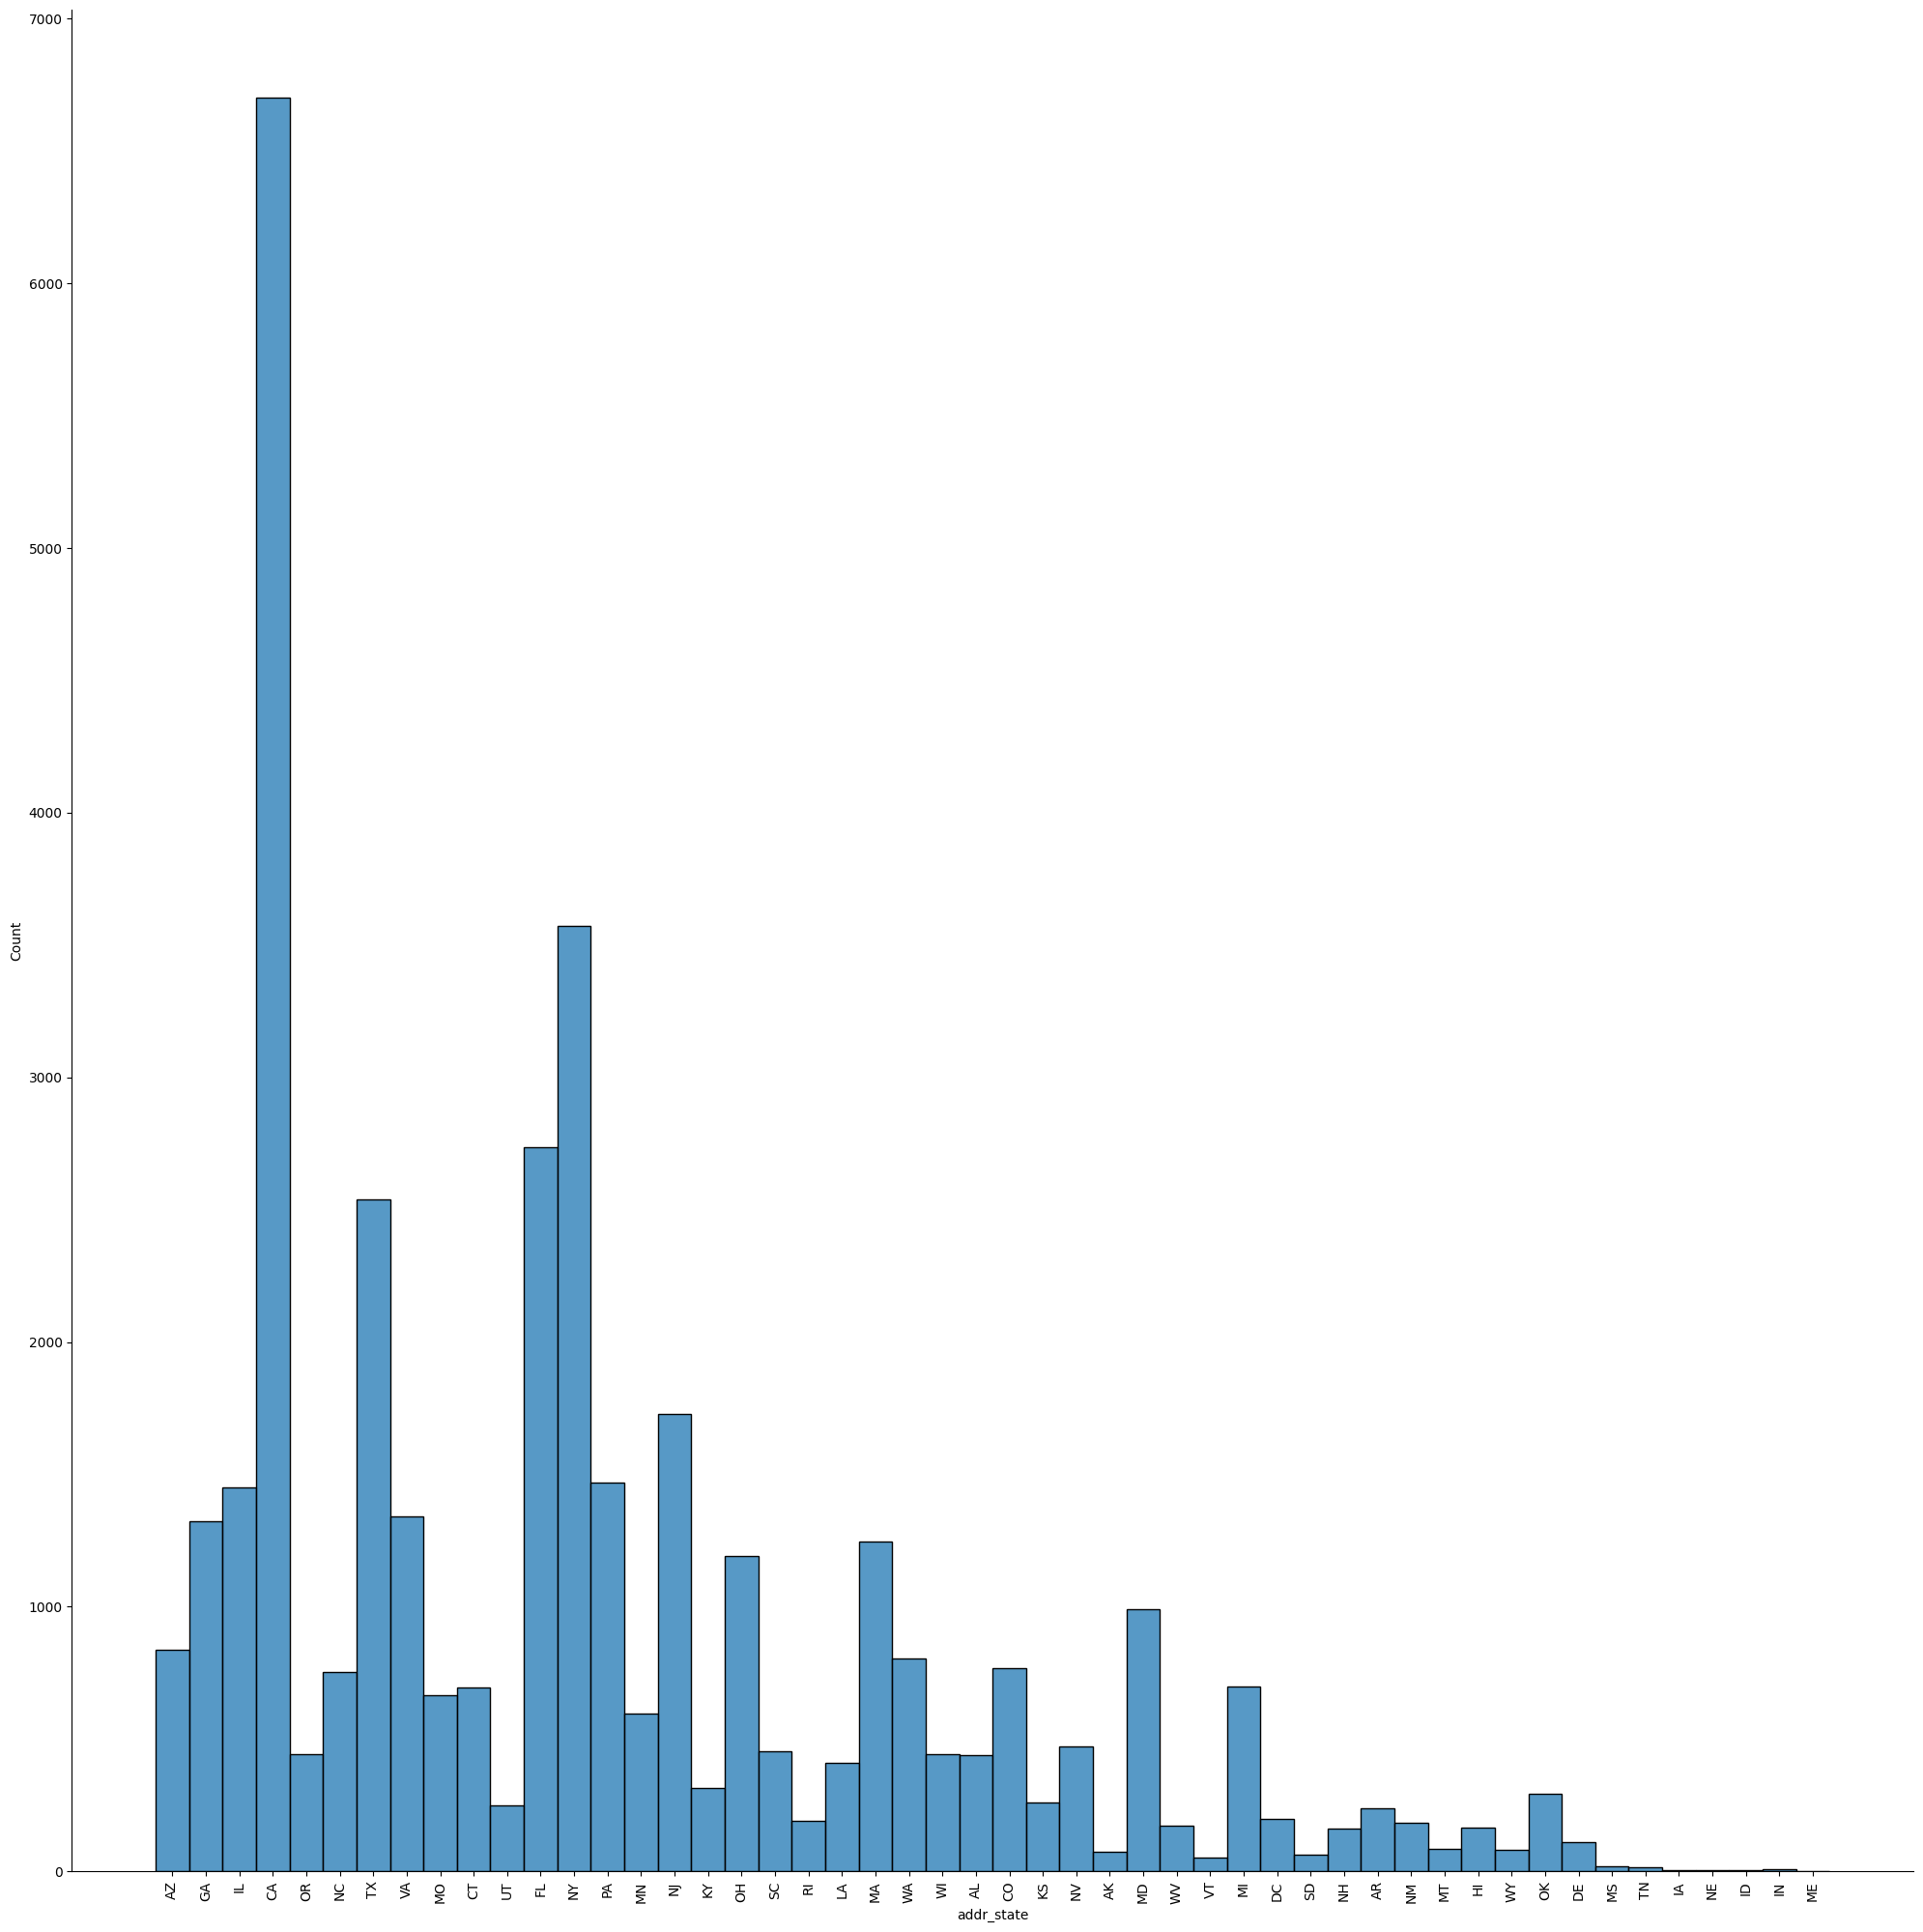

In [184]:
ax = sns.displot(df5, x='addr_state', discrete=True, height=20, aspect=20/20)
ax.tick_params(axis='x', rotation=90)

Lets analyze the employment length

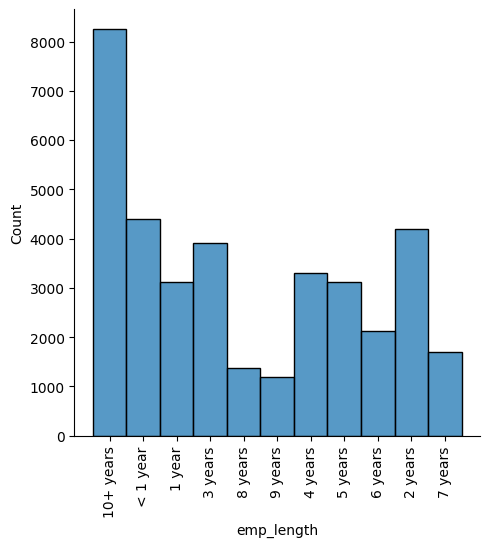

In [185]:
ax = sns.displot(df5, x='emp_length', discrete=True)
ax.tick_params(axis='x', rotation=90)

### Segmented Univariate Analysis
Lets perform segmented univariate analysis

Lets look at how annual income on segmented loan status

<Axes: xlabel='annual_inc', ylabel='loan_status'>

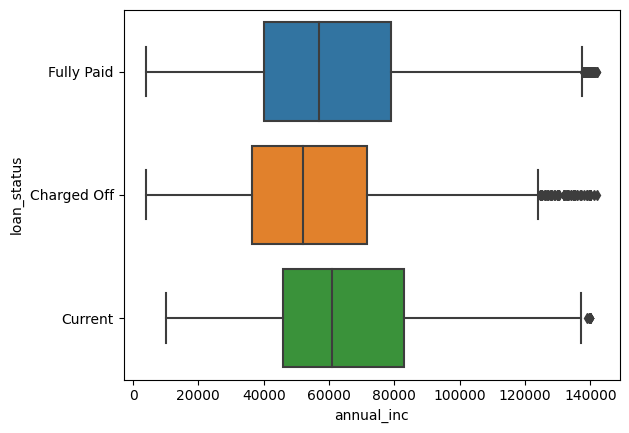

In [186]:
sns.boxplot(y='loan_status', x='annual_inc', data=df5)

Lets exclude 'Current' row data and concentrate on fully paid vs charged_off

In [227]:
df5 = df5[df5['loan_status'] != 'Current']
df5['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [229]:
df5 = df5.astype({'inq_last_6mths':int})

Converting percentage columns to float values

Lets look at how the interest rate is compared with loan status

In [187]:
df5.loc[:,'revol_util'] = pd.to_numeric(df5['revol_util'].str.strip('%'))

<ipython-input-187-9d1921e80667>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[:,'revol_util'] = pd.to_numeric(df5['revol_util'].str.strip('%'))
<ipython-input-187-9d1921e80667>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df5.loc[:,'revol_util'] = pd.to_numeric(df5['revol_util'].str.strip('%'))


In [188]:
df5.loc[:,'int_rate'] = pd.to_numeric(df5['int_rate'].str.strip('%'))

<ipython-input-188-90d761b3288f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[:,'int_rate'] = pd.to_numeric(df5['int_rate'].str.strip('%'))
<ipython-input-188-90d761b3288f>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df5.loc[:,'int_rate'] = pd.to_numeric(df5['int_rate'].str.strip('%'))


In [189]:
df5.loc[:,'term'] = pd.to_numeric((df5['term'].str).strip(' months'))

<ipython-input-189-dfb6826a5f3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[:,'term'] = pd.to_numeric((df5['term'].str).strip(' months'))
<ipython-input-189-dfb6826a5f3e>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df5.loc[:,'term'] = pd.to_numeric((df5['term'].str).strip(' months'))


In [190]:
df5.loc[:,'mths_since_last_delinq']=df5['mths_since_last_delinq'].fillna(0)

<ipython-input-190-541826d0e9d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.loc[:,'mths_since_last_delinq']=df5['mths_since_last_delinq'].fillna(0)


In [191]:
df5 = df5.astype({'mths_since_last_delinq':int})

Lets create two subsets of data, charged off and fully paid loans

In [194]:
fully_paid = df5[df5['loan_status'] == 'Fully Paid']

In [193]:
charged_off = df5[df5['loan_status'] == 'Charged Off']

<Axes: xlabel='inq_last_6mths', ylabel='Count'>

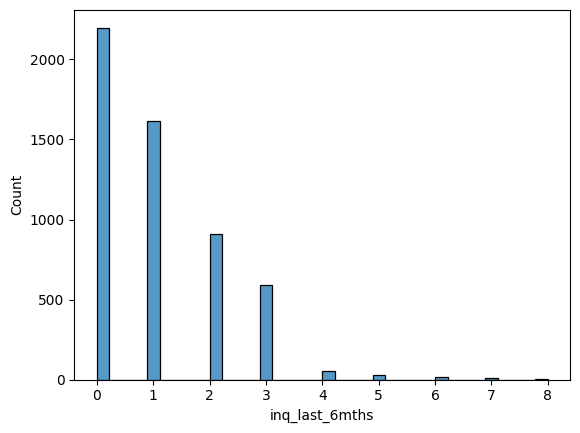

In [241]:
sns.histplot(data=charged_off,x='inq_last_6mths')

In [252]:
charged_off.columns[charged_off.dtypes == 'float64']

Index(['int_rate', 'installment', 'annual_inc', 'dti',
       'mths_since_last_record', 'revol_util', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [253]:
charged_off.columns[charged_off.dtypes == 'int']

Index(['loan_amnt', 'term', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc'],
      dtype='object')

<Axes: >

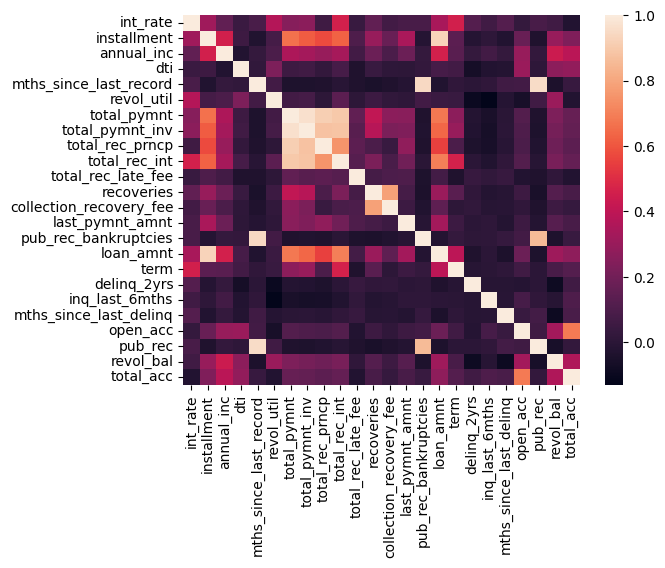

In [269]:
corr = charged_off[['int_rate', 'installment', 'annual_inc', 'dti',
       'mths_since_last_record', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies','loan_amnt', 'term', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc']].fillna(0).corr()
sns.heatmap(corr)

<Axes: xlabel='mths_since_last_delinq', ylabel='Count'>

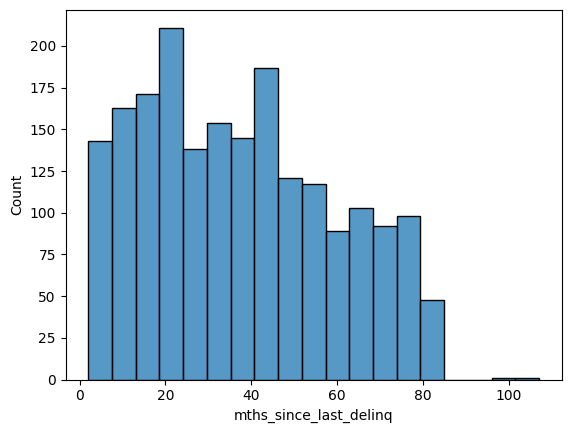

In [239]:
sns.histplot(data=charged_off[charged_off['mths_since_last_delinq']>1],x='mths_since_last_delinq')

Lets analyze how mths_since_last_delinq impacts the loan status


In [224]:
charged_off[['total_rec_prncp','total_rec_int']].corr()

,total_rec_prncp,total_rec_int
total_rec_prncp,1.000000,0.741682
total_rec_int,0.741682,1.000000


<Axes: xlabel='total_rec_int', ylabel='total_rec_prncp'>

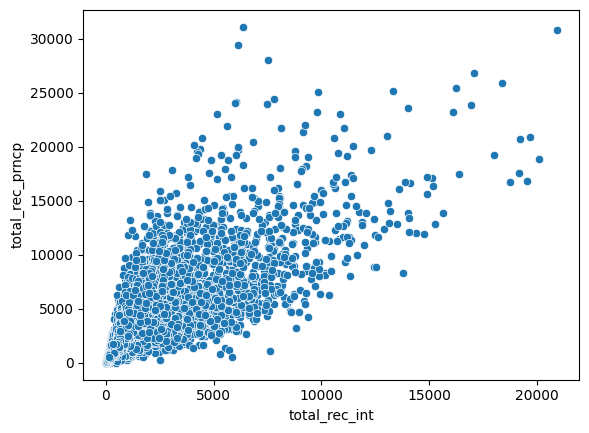

In [222]:
sns.scatterplot(data=charged_off,y='total_rec_prncp',x='total_rec_int')

In [195]:
charged_off[['annual_inc','int_rate']].corr()

,annual_inc,int_rate
annual_inc,1.000000,0.152288
int_rate,0.152288,1.000000


AttributeError: ignored

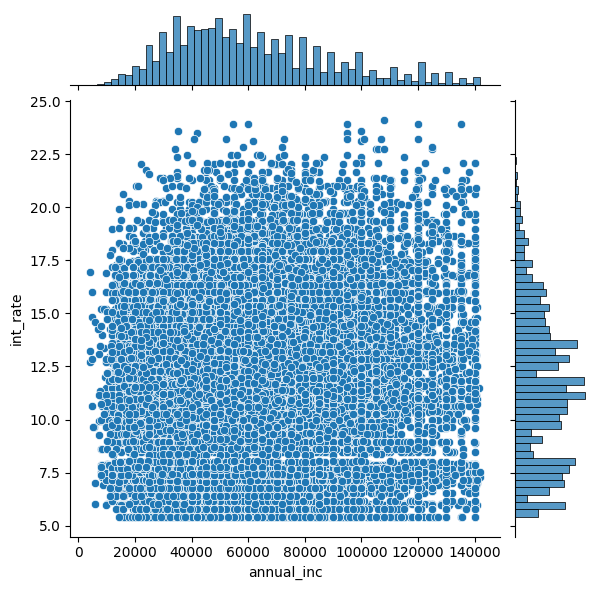

In [344]:
sns.jointplot(x='annual_inc', y='int_rate', data=fully_paid)


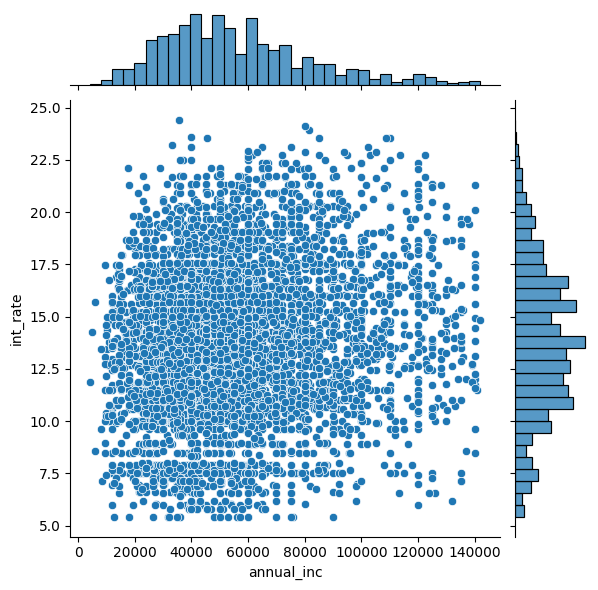

In [203]:
sns.jointplot(x='annual_inc', y='int_rate', data=charged_off)

In [ ]:
charged_off[['revol_util','int_rate']].corr()

In [206]:
fully_paid[['revol_bal','annual_inc']].corr()

,revol_bal,annual_inc
revol_bal,1.000000,0.393625
annual_inc,0.393625,1.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['revol_bal'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['annual_inc'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['revol_bal'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['annual_inc'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['revol_bal', 'annual_inc']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['annual_inc', 'revol_bal', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['annual_inc', 'count()', None], **{})
chart

<Axes: >

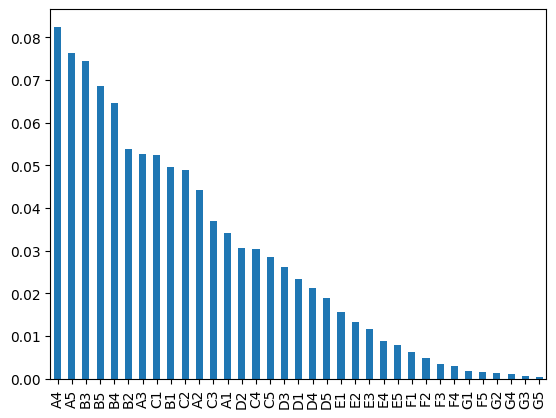

In [207]:
(fully_paid['sub_grade'].value_counts()/len(fully_paid)) .plot.bar()

<Axes: >

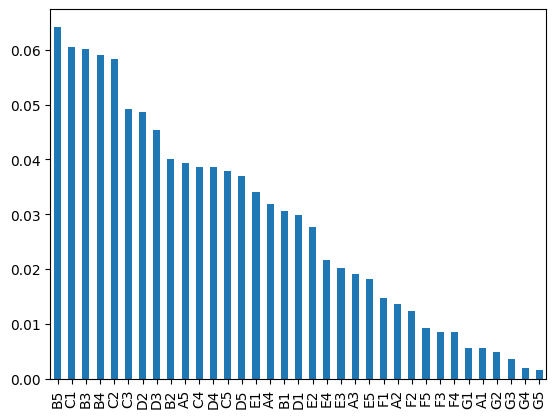

In [208]:
(charged_off['sub_grade'].value_counts()/len(charged_off)) .plot.bar()

<Axes: >

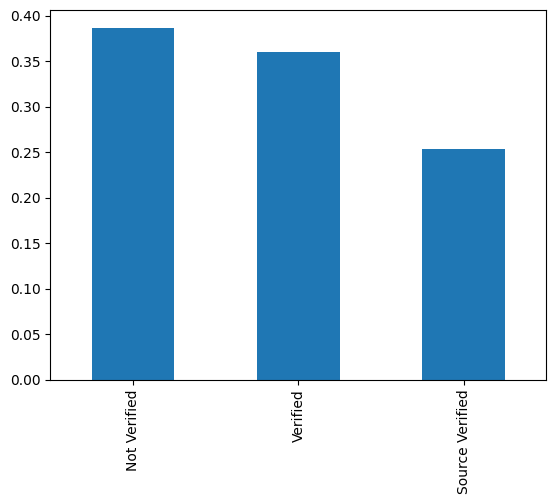

In [209]:
(charged_off['verification_status'].value_counts()/len(charged_off)) .plot.bar()

<Axes: >

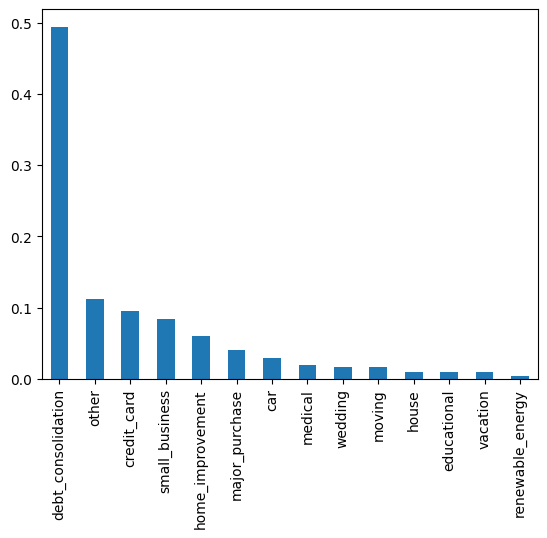

In [272]:
(charged_off['purpose'].value_counts()/len(charged_off)) .plot.bar()

<Axes: xlabel='loan_status', ylabel='revol_util'>

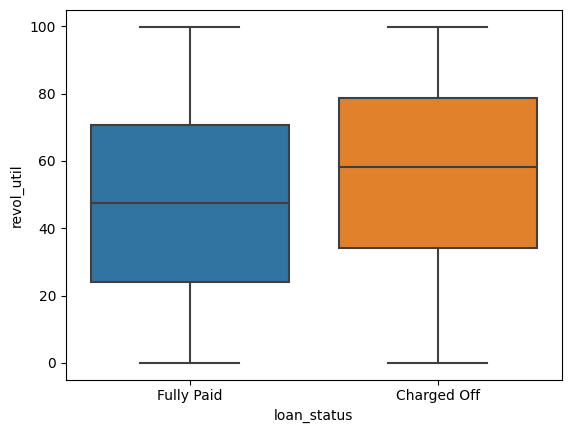

In [277]:
sns.boxplot(df5, x='loan_status',y='revol_util')

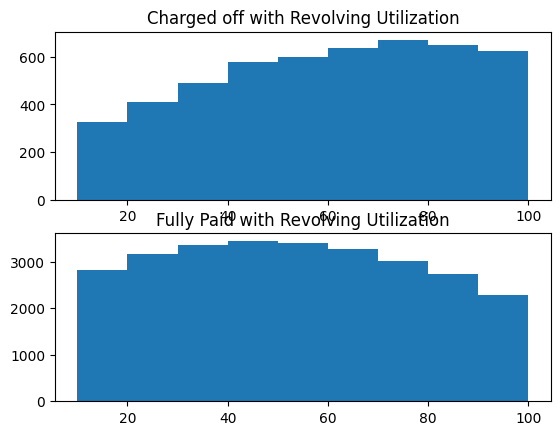

In [288]:
plt.subplot(2,1,1)
plt.hist(charged_off['revol_util'], bins=[10,20,30,40,50,60,70,80,90,100])
plt.title('Charged off with Revolving Utilization')
plt.subplot(2,1,2)
plt.hist(fully_paid['revol_util'], bins=[10,20,30,40,50,60,70,80,90,100])
plt.title('Fully Paid with Revolving Utilization')
plt.show()

In [293]:
charged_off['purpose'].value_counts()

debt_consolidation    2678
other                  605
credit_card            519
small_business         454
home_improvement       322
major_purchase         217
car                    159
medical                104
wedding                 93
moving                  90
house                   55
educational             54
vacation                52
renewable_energy        18
Name: purpose, dtype: int64

In [294]:
df5['purpose'].value_counts()

debt_consolidation    17311
credit_card            4786
other                  3701
home_improvement       2560
major_purchase         2048
small_business         1624
car                    1450
wedding                 895
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: purpose, dtype: int64

In [343]:
round((charged_off['purpose'].value_counts()/df5['purpose'].value_counts())*100)

car                   11.0
credit_card           11.0
debt_consolidation    15.0
educational           17.0
home_improvement      13.0
house                 16.0
major_purchase        11.0
medical               16.0
moving                16.0
other                 16.0
renewable_energy      19.0
small_business        28.0
vacation              14.0
wedding               10.0
Name: purpose, dtype: float64